# Lista de Exercício Apriori

## Data entrega: ver ava  
Regra individual

---

### **Exercício 1 — Teórico (passo a passo; máximo 3-itemsets)**

#### Enunciado (faça os cálculos manualmente):  
Considere a base com 10 transações abaixo. Use suporte mínimo = 30% (ou seja, ocorrência mínima = 30% de 10 = 3 transações) e confiança mínima = 75%. Gere todos os frequent itemsets até tamanho 3 e todas as regras de associação cuja confiança ≥ 75%.  

**Base (T1..T10):**  
- T1: {Leite, Pão, Manteiga}  
- T2: {Leite, Fralda, Cerveja, Ovos}  
- T3: {Pão, Manteiga, Fruta}  
- T4: {Leite, Pão, Fralda, Manteiga}  
- T5: {Pão, Fralda, Cerveja}  
- T6: {Leite, Pão, Manteiga, Ovos}  
- T7: {Fralda, Cerveja}  
- T8: {Leite, Pão, Fruta}  
- T9: {Pão, Manteiga}  
- T10: {Leite, Cerveja, Ovos}

#### Passos que o aluno deve executar (ordem sugerida):
1. Contar suporte de todos os 1-itemsets; listar os que têm suporte ≥ 3.
2. Gerar candidatos 2-itemsets a partir dos 1-itemsets frequentes; contar suportes; manter os que têm suporte ≥ 3.
3. Gerar candidatos 3-itemsets a partir dos 2-itemsets frequentes; contar suportes; manter os que têm suporte ≥ 3.
4. A partir de cada frequent itemset com |I|≥2, gerar regras (todas as partições A→B com A∪B=I e A∩B=∅) e calcular confiança = support(I) / support(A). Selecionar regras com confiança ≥ 75%.

---




In [ ]:
# 1. 
pao = 7/10      # 70%
leite = 6/10    # 60%
manteiga = 5/10 # 50%
fralda = 4/10   # 40%
cerveja = 4/10  # 40%
ovos = 3/ 10    # 30%
fruta = 2/10    # 20%

# somente pao, leite, manteiga,fralda, cerveja, ovos e tiveram suporte >= 3 

# 2. 
# {Manteiga, Pão}: 5 → 0.5 (50%)
# {Leite, Pão}: 4 → 0.4 (40%)
# {Cerveja, Fralda}: 3 → 0.3 (30%)
# {Leite, Manteiga}: 3 → 0.3 (30%)
# {Leite, Ovos}: 3 → 0.3 (30%)
# {Cerveja, Leite}: 2 → 0.2 (20%) — descartado
# {Cerveja, Ovos}: 2 → 0.2 (20%) — descartado
# {Fralda, Leite}: 2 → 0.2 — descartado
# {Fralda, Pão}: 2 → 0.2 — descartado
# outras combinações com contagem <3 — descartadas
# Frequent 2-itemsets (≥3):
# {Manteiga, Pão} (5), {Leite, Pão} (4), {Cerveja, Fralda} (3), {Leite, Manteiga} (3), {Leite, Ovos} (3)




### **Exercício 2 — Prático (implemente Apriori / use biblioteca)**

#### Enunciado:  
Use a base abaixo (formato transação por linha) — são 15 transações — e execute o algoritmo Apriori programaticamente (linguagem à sua escolha: Python, R, Weka, etc.).  
Use suporte mínimo = 20% (3 transações) e confiança mínima = 70%. Liste os frequent itemsets e as 10 regras com maior lift.

**Base (cada linha = uma transação, CSV ou texto):**  
1. Leite, Pão, Manteiga  
2. Leite, Fralda, Cerveja, Ovos  
3. Pão, Manteiga, Fruta  
4. Leite, Pão, Fralda, Manteiga  
5. Pão, Fralda, Cerveja  
6. Leite, Pão, Manteiga, Ovos  
7. Fralda, Cerveja  
8. Leite, Pão, Fruta  
9. Pão, Manteiga  
10. Leite, Cerveja, Ovos  
11. Pão, Chocolate  
12. Leite, Chocolate, Pão  
13. Cerveja, Chips  
14. Pão, Chips  
15. Manteiga, Pão

---

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori, association_rules

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ian\AppData\Local\Temp\ipykernel_8412\2961000965.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


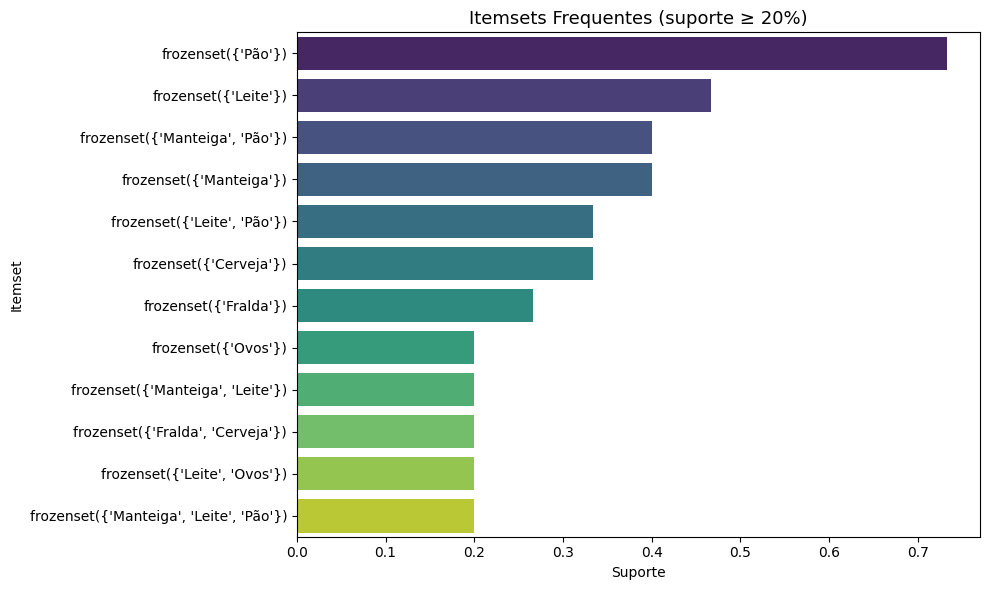

C:\Users\Ian\AppData\Local\Temp\ipykernel_8412\2961000965.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


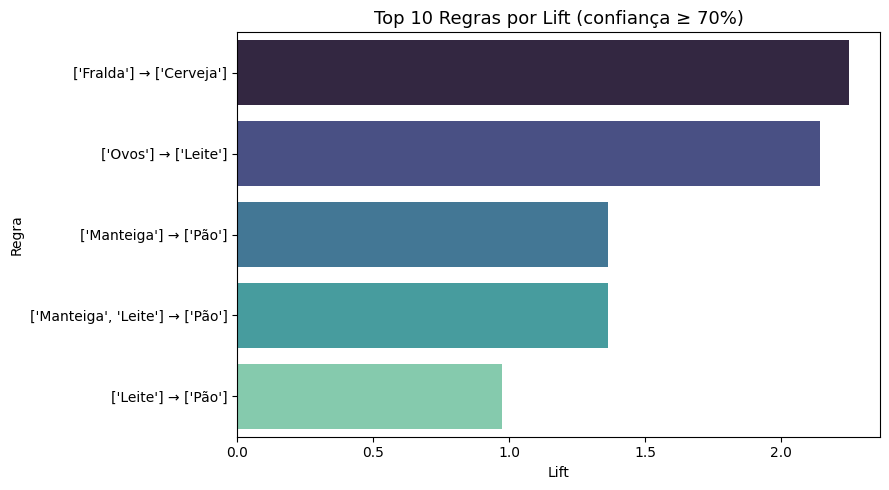

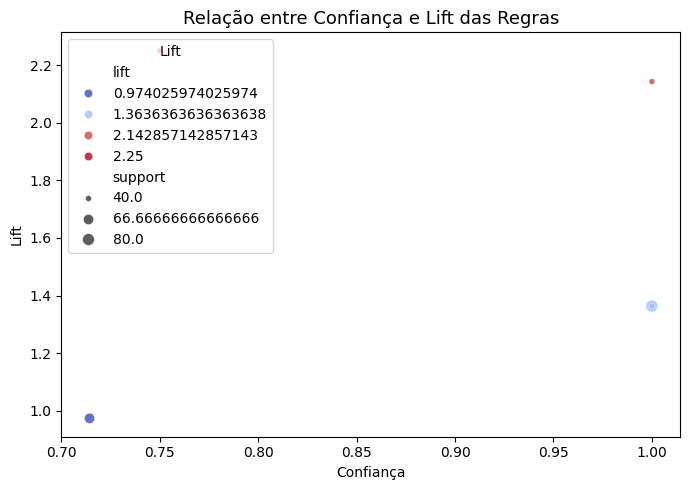

=== TOP 10 REGRAS (por Lift) ===
         antecedents consequents   support  confidence      lift
0           (Fralda)   (Cerveja)  0.200000    0.750000  2.250000
1             (Ovos)     (Leite)  0.200000    1.000000  2.142857
3         (Manteiga)       (Pão)  0.400000    1.000000  1.363636
4  (Manteiga, Leite)       (Pão)  0.200000    1.000000  1.363636
2            (Leite)       (Pão)  0.333333    0.714286  0.974026


In [ ]:
transactions = [
    ['Leite','Pão','Manteiga'],
    ['Leite','Fralda','Cerveja','Ovos'],
    ['Pão','Manteiga','Fruta'],
    ['Leite','Pão','Fralda','Manteiga'],
    ['Pão','Fralda','Cerveja'],
    ['Leite','Pão','Manteiga','Ovos'],
    ['Fralda','Cerveja'],
    ['Leite','Pão','Fruta'],
    ['Pão','Manteiga'],
    ['Leite','Cerveja','Ovos'],
    ['Pão','Chocolate'],
    ['Leite','Chocolate','Pão'],
    ['Cerveja','Chips'],
    ['Pão','Chips'],
    ['Manteiga','Pão']
]

# passar para df 
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# aplicar apriori
itemsetsFrequentes = apriori(df, min_support=0.2, use_colnames=True)
regras = association_rules(itemsetsFrequentes, metric="confidence", min_threshold=0.7)
regras = regras.sort_values(by='lift', ascending=False)

# plot 1
plt.figure(figsize=(10,6))
itemsetsFrequentesSorteados = itemsetsFrequentes.sort_values(by="support", ascending=False)
sns.barplot(
    x=itemsetsFrequentesSorteados["support"], 
    y=itemsetsFrequentesSorteados["itemsets"].astype(str),
    palette="viridis"
)

plt.title("Itemsets Frequentes (suporte ≥ 20%)", fontsize=13)
plt.xlabel("Suporte")
plt.ylabel("Itemset")
plt.tight_layout()
plt.show()

# plot 2
topRegras = regras.head(10)
plt.figure(figsize=(9, 5))
sns.barplot(
    x=topRegras["lift"], 
    y=topRegras.apply(lambda x: f"{list(x['antecedents'])} → {list(x['consequents'])}", axis=1),
    palette="mako"
)
plt.title("Top 10 Regras por Lift (confiança ≥ 70%)", fontsize=13)
plt.xlabel("Lift")
plt.ylabel("Regra")
plt.tight_layout()
plt.show()

# plot 3
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=regras["confidence"], 
    y=regras["lift"], 
    size=regras["support"]*200, 
    hue=regras["lift"], 
    palette="coolwarm", 
    alpha=0.8
)
plt.title("Relação entre Confiança e Lift das Regras", fontsize=13)
plt.xlabel("Confiança")
plt.ylabel("Lift")
plt.legend(title="Lift", loc="upper left")
plt.tight_layout()
plt.show()

print("TOP 10 REGRAS (por Lift)")
print(topRegras[['antecedents','consequents','support','confidence','lift']])


### **Exercício 3 — Apriori aplicado à Educação (hábitos de estudo e desempenho)**

#### Contexto  
Um coordenador pedagógico quer entender padrões de comportamento entre alunos, para melhorar o desempenho geral e recomendar boas práticas de estudo.  
Foi montada uma base onde cada linha representa um aluno e os “itens” representam características observadas sobre seu comportamento acadêmico.

**Base de transações (15 alunos):**  
Cada aluno possui um conjunto de características (itens):

- **A1** {Estuda_todo_dia, Assiste_aulas_online, Faz_exercícios, Nota_alta}  
- **A2** {Estuda_todo_dia, Faz_exercícios, Nota_alta}  
- **A3** {Estuda_véspera, Faz_exercícios, Nota_média}  
- **A4** {Estuda_todo_dia, Assiste_aulas_online, Faz_resumos, Nota_alta}  
- **A5** {Estuda_véspera, Não_faz_exercícios, Nota_baixa}  
- **A6** {Estuda_fim_de_semana, Faz_resumos, Nota_média}  
- **A7** {Estuda_todo_dia, Faz_exercícios, Faz_resumos, Nota_alta}  
- **A8** {Estuda_véspera, Faz_exercícios, Nota_baixa}  
- **A9** {Estuda_fim_de_semana, Faz_exercícios, Nota_média}  
- **A10** {Estuda_todo_dia, Assiste_aulas_online, Nota_alta}  
- **A11** {Estuda_véspera, Não_faz_exercícios, Nota_baixa}  
- **A12** {Estuda_todo_dia, Faz_resumos, Nota_alta}  
- **A13** {Estuda_fim_de_semana, Faz_exercícios, Nota_média}  
- **A14** {Estuda_véspera, Faz_resumos, Nota_média}  
- **A15** {Estuda_todo_dia, Faz_exercícios, Nota_alta}

#### Tarefas:
1. Carregue os dados acima (como lista de listas ou array).
2. Execute o algoritmo Apriori usando os parâmetros:
   - Suporte mínimo = 20%  
   - Confiança mínima = 70%  
3. Liste:
   - Todos os itemsets frequentes com seus suportes.  
   - As 5 regras com maior confiança.  
4. Interprete pelo menos duas regras.  
   - Exemplo de interpretação esperada:  
   “Alunos que estudam todo dia e fazem exercícios têm alta probabilidade de ter nota alta (confiança = 90%, lift = 1.3). Isso indica que incentivar prática diária e exercícios pode melhorar o desempenho médio.”

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Ian\AppData\Local\Temp\ipykernel_8412\3245215786.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


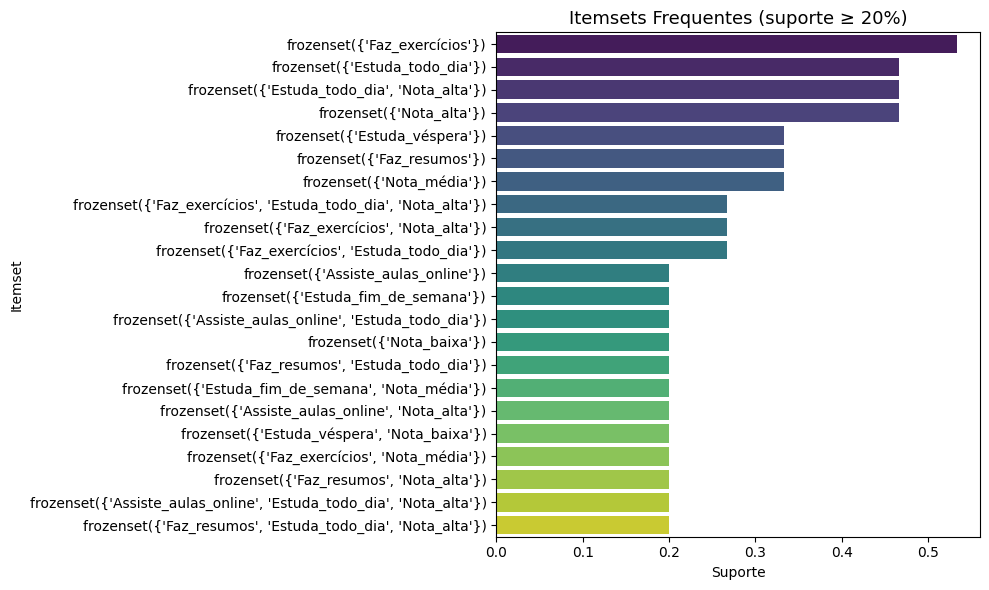

ITEMSETS FREQUENTES 
     support                                           itemsets
4   0.533333                                   (Faz_exercícios)
2   0.466667                                  (Estuda_todo_dia)
14  0.466667                       (Estuda_todo_dia, Nota_alta)
6   0.466667                                        (Nota_alta)
3   0.333333                                   (Estuda_véspera)
5   0.333333                                      (Faz_resumos)
8   0.333333                                       (Nota_média)
20  0.266667       (Faz_exercícios, Estuda_todo_dia, Nota_alta)
16  0.266667                        (Faz_exercícios, Nota_alta)
12  0.266667                  (Faz_exercícios, Estuda_todo_dia)
0   0.200000                             (Assiste_aulas_online)
1   0.200000                             (Estuda_fim_de_semana)
9   0.200000            (Assiste_aulas_online, Estuda_todo_dia)
7   0.200000                                       (Nota_baixa)
13  0.200000       

In [4]:
transactions = [
    ['Estuda_todo_dia', 'Assiste_aulas_online', 'Faz_exercícios', 'Nota_alta'],             # A1
    ['Estuda_todo_dia', 'Faz_exercícios', 'Nota_alta'],                                     # A2
    ['Estuda_véspera', 'Faz_exercícios', 'Nota_média'],                                     # A3
    ['Estuda_todo_dia', 'Assiste_aulas_online', 'Faz_resumos', 'Nota_alta'],                # A4
    ['Estuda_véspera', 'Não_faz_exercícios', 'Nota_baixa'],                                 # A5
    ['Estuda_fim_de_semana', 'Faz_resumos', 'Nota_média'],                                  # A6
    ['Estuda_todo_dia', 'Faz_exercícios', 'Faz_resumos', 'Nota_alta'],                      # A7
    ['Estuda_véspera', 'Faz_exercícios', 'Nota_baixa'],                                     # A8
    ['Estuda_fim_de_semana', 'Faz_exercícios', 'Nota_média'],                               # A9
    ['Estuda_todo_dia', 'Assiste_aulas_online', 'Nota_alta'],                               # A10
    ['Estuda_véspera', 'Não_faz_exercícios', 'Nota_baixa'],                                 # A11
    ['Estuda_todo_dia', 'Faz_resumos', 'Nota_alta'],                                        # A12
    ['Estuda_fim_de_semana', 'Faz_exercícios', 'Nota_média'],                               # A13
    ['Estuda_véspera', 'Faz_resumos', 'Nota_média'],                                        # A14
    ['Estuda_todo_dia', 'Faz_exercícios', 'Nota_alta']                                      # A15
]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)


itemsetsFrequentes = apriori(df, min_support=0.2, use_colnames=True)
regras = association_rules(itemsetsFrequentes, metric="confidence", min_threshold=0.7)
regras = regras.sort_values(by="confidence", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x=itemsetsFrequentes.sort_values(by="support", ascending=False)["support"],
    y=itemsetsFrequentes.sort_values(by="support", ascending=False)["itemsets"].astype(str),
    palette="viridis"
)
plt.title("Itemsets Frequentes (suporte ≥ 20%)", fontsize=13)
plt.xlabel("Suporte")
plt.ylabel("Itemset")
plt.tight_layout()
plt.show()


print("ITEMSETS FREQUENTES ")
print(itemsetsFrequentes.sort_values(by="support", ascending=False))
print("\nTOP 5 REGRAS (por confiança) ")
print(regras[['antecedents','consequents','support','confidence','lift']].head(5))
